<h1 align="center" style="color: orange;">TAREA 08 UNIDAD 03-C</h1>

**Nombre:** Camila Caicedo

**Curso:** GR1CC

**Fecha de entrega:** 07/01/2026

**Enlace al repositorio:** https://github.com/dxcam/TalleresMetodosNumericos.git

<h3 align="center" style="color: orange;">MÍNIMOS CUADRADOS</h3>

**1) Dados los datos**


| $x_i$   | 4.0   | 4.2   | 4.5   | 4.7   | 5.1   | 5.5   | 5.9   | 6.3   | 6.8   | 7.1   |
|---------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| $y_i$   | 102.56| 130.11| 113.18| 142.05| 167.53| 195.14| 224.87| 256.73| 299.50| 326.72|

**a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.**

polinomio de grado 1 -> y = mx + b

- $\sum x_i = 54.1$
- $\sum y_i = 1958.39$ 
- $\sum x_iy_i = 11361.764$ 
- $\sum x_i^2 = 303.39$ 

- $m \sum_i x_i + nb = \sum y_i$ **[1]**

$54.1m + 10b = 1958.39$

- $m \sum_i x_i^2 + b \sum_i = \sum x_iy_i$ **[2]**

$303.39m + 54.1b = 11361.764 $

- m = 71.31024386
- b = -191.5724193

$E = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

$E = 1058.84$



Polinomio de grado 1: y = -191.5724 + 71.6102x
Error (SSE): 1058.8389
Error medio cuadrático (MSE): 105.8839
Raíz del MSE (RMSE): 10.2900


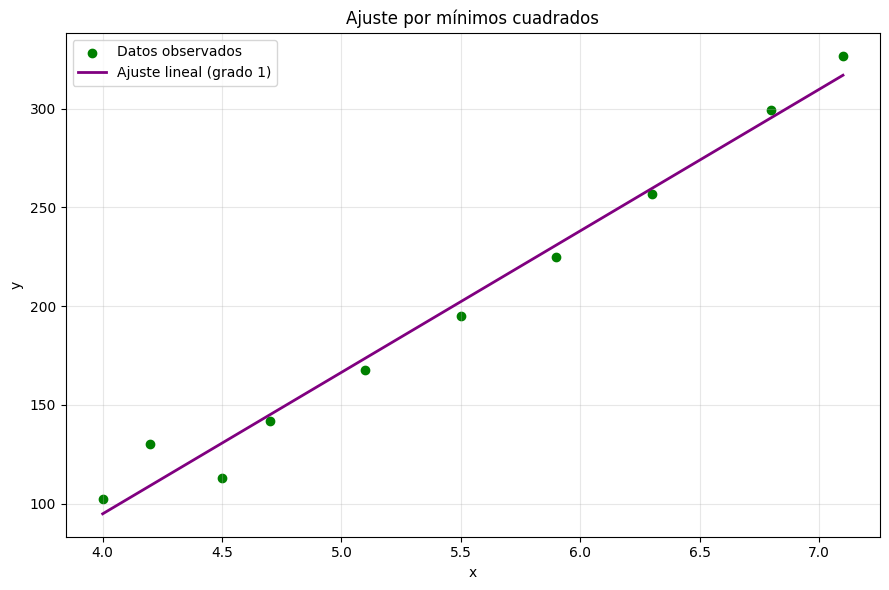

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

n = len(x)

# Cálculo de coeficientes por fórmulas de mínimos cuadrados
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)  # pendiente
a0 = (sum_y - a1 * sum_x) / n                                 # intercepto

# Valores ajustados y errores
y_hat = a0 + a1 * x
SSE = np.sum((y - y_hat)**2)   # Suma de cuadrados de los residuos (Error)
MSE = SSE / n                  # Error medio cuadrático
RMSE = np.sqrt(MSE)            # Raíz del error medio cuadrático

print(f"Polinomio de grado 1: y = {a0:.4f} + {a1:.4f}x")
print(f"Error (SSE): {SSE:.4f}")
print(f"Error medio cuadrático (MSE): {MSE:.4f}")
print(f"Raíz del MSE (RMSE): {RMSE:.4f}")

# Gráfica
plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='green', label='Datos observados')
plt.plot(x, y_hat, color='purple', linewidth=2, label='Ajuste lineal (grado 1)')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.**


Polinomio de grado 2: y = 51.000789 + -19.308604*x + 8.217072*x^2
Error (SSE) = 551.656200
Error medio cuadrático (MSE) = 55.165620
Raíz del MSE (RMSE) = 7.427356


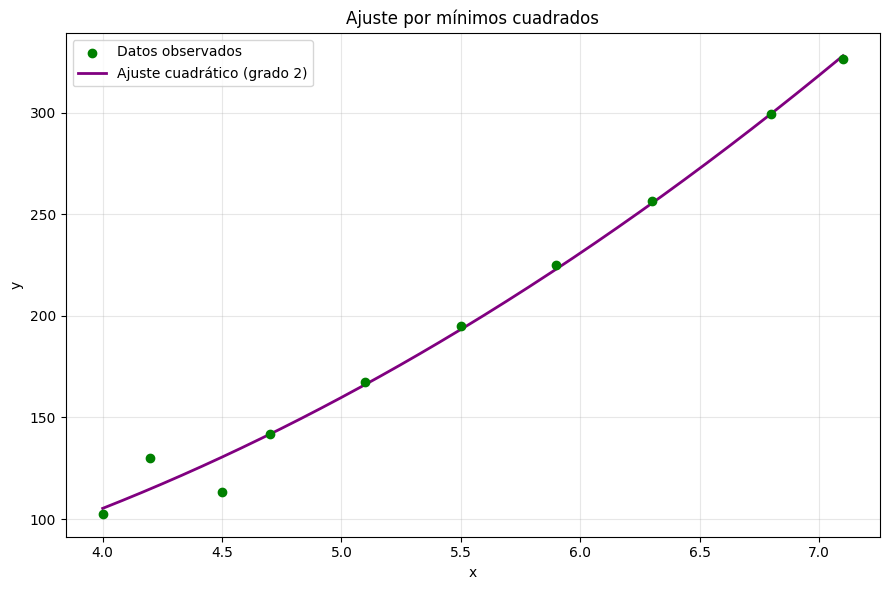

In [15]:

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1], dtype=float)
y = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72], dtype=float)

n = len(x)

# --- Sumas necesarias para las ecuaciones normales (grado 2) ---
sum_x   = np.sum(x)
sum_x2  = np.sum(x**2)
sum_x3  = np.sum(x**3)
sum_x4  = np.sum(x**4)

sum_y   = np.sum(y)
sum_xy  = np.sum(x * y)
sum_x2y = np.sum((x**2) * y)

# --- Sistema lineal: [a0, a1, a2] de p2(x) = a0 + a1*x + a2*x^2 ---
# Matriz de diseño de ecuaciones normales:
# [ n       sum_x    sum_x2 ] [a0]   [ sum_y  ]
# [ sum_x   sum_x2   sum_x3 ] [a1] = [ sum_xy ]
# [ sum_x2  sum_x3   sum_x4 ] [a2]   [ sum_x2y]
A = np.array([
    [n,      sum_x,  sum_x2],
    [sum_x,  sum_x2, sum_x3],
    [sum_x2, sum_x3, sum_x4]
], dtype=float)

b = np.array([sum_y, sum_xy, sum_x2y], dtype=float)

# Resolver el sistema para obtener a0, a1, a2
a0, a1, a2 = np.linalg.solve(A, b)

# Valores ajustados y residuos
y_hat = a0 + a1*x + a2*(x**2)
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)      # Suma de cuadrados de los residuos
MSE = SSE / n                  # Error cuadrático medio
RMSE = np.sqrt(MSE)            # Raíz del error cuadrático medio
SS_tot = np.sum((y - np.mean(y))**2)

# Mostrar resultados
print(f"Polinomio de grado 2: y = {a0:.6f} + {a1:.6f}*x + {a2:.6f}*x^2")
print(f"Error (SSE) = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# Gráfica
x_grid = np.linspace(min(x), max(x), 300)
y_grid = a0 + a1*x_grid + a2*(x_grid**2)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='green', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='purple', linewidth=2, label='Ajuste cuadrático (grado 2)')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.**

Polinomio de grado 3: y = 469.163265 + -254.874783*x + 51.560957*x^2 + -2.606839*x^3
Error (SSE) = 518.383065
Error medio cuadrático (MSE) = 51.838306
Raíz del MSE (RMSE) = 7.199882


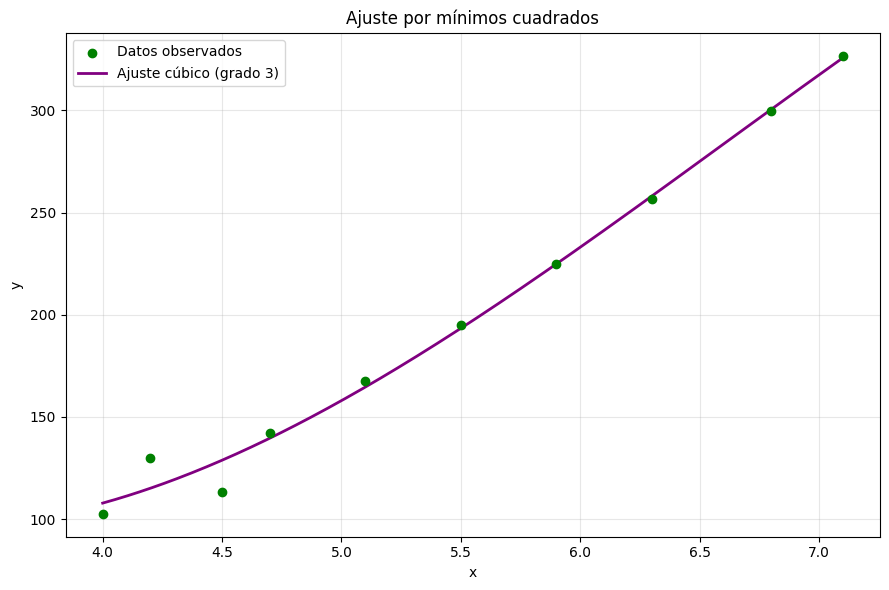

In [17]:

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1], dtype=float)
y = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72], dtype=float)

n = len(x)

# --- Sumas necesarias para las ecuaciones normales (grado 3) ---
sum_x   = np.sum(x)
sum_x2  = np.sum(x**2)
sum_x3  = np.sum(x**3)
sum_x4  = np.sum(x**4)
sum_x5  = np.sum(x**5)
sum_x6  = np.sum(x**6)

sum_y    = np.sum(y)
sum_xy   = np.sum(x * y)
sum_x2y  = np.sum((x**2) * y)
sum_x3y  = np.sum((x**3) * y)

# --- Sistema lineal: [a0, a1, a2, a3] de p3(x) = a0 + a1*x + a2*x^2 + a3*x^3 ---
# Matriz de ecuaciones normales (4x4):
# [ n       sum_x    sum_x2   sum_x3 ] [a0]   [ sum_y  ]
# [ sum_x   sum_x2   sum_x3    sum_x4] [a1] = [ sum_xy ]
# [ sum_x2  sum_x3   sum_x4    sum_x5] [a2]   [ sum_x2y]
# [ sum_x3  sum_x4   sum_x5    sum_x6] [a3]   [ sum_x3y]
A = np.array([
    [n,      sum_x,  sum_x2, sum_x3],
    [sum_x,  sum_x2, sum_x3, sum_x4],
    [sum_x2, sum_x3, sum_x4, sum_x5],
    [sum_x3, sum_x4, sum_x5, sum_x6]
], dtype=float)

b = np.array([sum_y, sum_xy, sum_x2y, sum_x3y], dtype=float)

# Resolver el sistema para obtener a0, a1, a2, a3
a0, a1, a2, a3 = np.linalg.solve(A, b)

# Valores ajustados y residuos
y_hat = a0 + a1*x + a2*(x**2) + a3*(x**3)
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)      # Suma de cuadrados de los residuos
MSE = SSE / n                  # Error cuadrático medio
RMSE = np.sqrt(MSE)            # Raíz del error cuadrático medio
SS_tot = np.sum((y - np.mean(y))**2)

# Mostrar resultados
print(f"Polinomio de grado 3: y = {a0:.6f} + {a1:.6f}*x + {a2:.6f}*x^2 + {a3:.6f}*x^3")
print(f"Error (SSE) = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# Gráfica
x_grid = np.linspace(min(x), max(x), 300)
y_grid = a0 + a1*x_grid + a2*(x_grid**2) + a3*(x_grid**3)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='green', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='purple', linewidth=2, label='Ajuste cúbico (grado 3)')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



**d. Construya el polinomio por mínimos cuadrados de la forma $ be^{ax} $ y calcule el error.**

a = 0.368477
b = 24.776724

Polinomio exponencial: y = 24.776724 * exp(0.368477 * x)
Error (SSE) = 821.005109
Error medio cuadrático (MSE) = 82.100511
Raíz del MSE (RMSE) = 9.060933


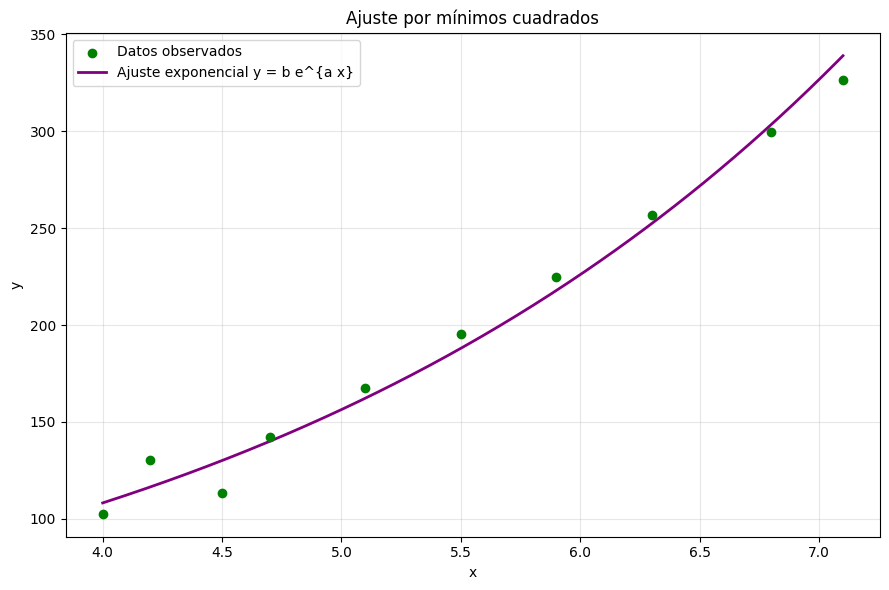

In [24]:

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1], dtype=float)
y = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72], dtype=float)

# Verificación: el modelo exponencial requiere y > 0
if np.any(y <= 0):
    raise ValueError("Para el ajuste exponencial se requiere y > 0 en todos los puntos.")

n = len(x)

# Linearización: ln(y) = ln(b) + a*x
lny = np.log(y)

# --- Sumas necesarias (ecuaciones normales para el ajuste lineal de lny) ---
sum_x    = np.sum(x)
sum_x2   = np.sum(x**2)
sum_lny  = np.sum(lny)
sum_xlny = np.sum(x * lny)

# Estimación de a y ln(b)
a = (n * sum_xlny - sum_x * sum_lny) / (n * sum_x2 - sum_x**2)
alpha = (sum_lny - a * sum_x) / n   # alpha = ln(b)
b = np.exp(alpha)

# Predicciones en el espacio original y errores
y_hat = b * np.exp(a * x)
residuos = y - y_hat

SSE = np.sum(residuos**2)          # Suma de cuadrados de los residuos
MSE = SSE / n                      # Error cuadrático medio
RMSE = np.sqrt(MSE)                # Raíz del ECM
SS_tot = np.sum((y - np.mean(y))**2)

# Resultados
print(f"a = {a:.6f}")
print(f"b = {b:.6f}")
print(f"\nPolinomio exponencial: y = {b:.6f} * exp({a:.6f} * x)")

print(f"Error (SSE) = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# Gráfica
x_grid = np.linspace(min(x), max(x), 300)
y_grid = b * np.exp(a * x_grid)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='green', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='purple', linewidth=2, label='Ajuste exponencial y = b e^{a x}')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**e. Construya el polinomio por mínimos cuadrados de la forma $ bx^a $ y calcule el error.**

a = 1.993285
b = 6.518682

Función ajustada: y = 6.518682 * x^1.993285
Error (SSE) = 581.557273
Error medio cuadrático (MSE) = 58.155727
Raíz del MSE (RMSE) = 7.625990


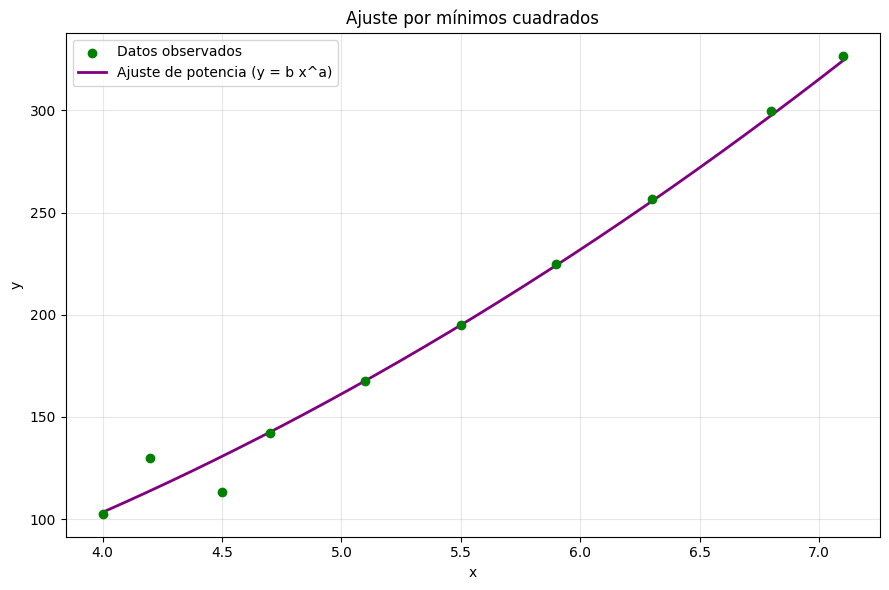

In [25]:

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1], dtype=float)
y = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72], dtype=float)

# Verificaciones (requerido para log-transformación)
if np.any(x <= 0):
    raise ValueError("El ajuste de potencia requiere x > 0.")
if np.any(y <= 0):
    raise ValueError("El ajuste de potencia requiere y > 0.")

n = len(x)

# Linearización: ln(y) = ln(b) + a*ln(x)
lnx = np.log(x)
lny = np.log(y)

# Sumas para las ecuaciones normales del ajuste lineal
sum_lnx    = np.sum(lnx)
sum_lnx2   = np.sum(lnx**2)
sum_lny    = np.sum(lny)
sum_lnxlny = np.sum(lnx * lny)

# Estimación de a y ln(b)
a = (n * sum_lnxlny - sum_lnx * sum_lny) / (n * sum_lnx2 - sum_lnx**2)
alpha = (sum_lny - a * sum_lnx) / n  # alpha = ln(b)
b = np.exp(alpha)

# Predicciones y residuos en el espacio original
y_hat = b * (x**a)
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)            # suma de cuadrados de los residuos
MSE = SSE / n                        # error cuadrático medio
RMSE = np.sqrt(MSE)                  # raíz del ECM
SS_tot = np.sum((y - np.mean(y))**2)

# Resultados
print(f"a = {a:.6f}")
print(f"b = {b:.6f}")
print(f"\nFunción ajustada: y = {b:.6f} * x^{a:.6f}")

print(f"Error (SSE) = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# Gráfica del ajuste
x_grid = np.linspace(x.min(), x.max(), 300)
y_grid = b * (x_grid**a)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='green', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='purple', linewidth=2, label='Ajuste de potencia (y = b x^a)')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**2. Repita el ejercicio 5 para los siguientes datos.**

| xi   | 0.2  | 0.3   | 0.6   | 0.9   | 1.1   | 1.3   | 1.4   | 1.6   |
|------|-------|-------|-------|-------|-------|-------|-------|-------|
| yi   | 0.050446| 0.098426| 0.33277| 0.72660 | 1.0972 | 1.5697 | 1.8487| 2.5015|


**a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.**

Polinomio de grado 1: y = -0.512457 + 1.665540*x
Error (SSE) = 0.335590
Error medio cuadrático (MSE) = 0.041949
Raíz del MSE (RMSE) = 0.204814


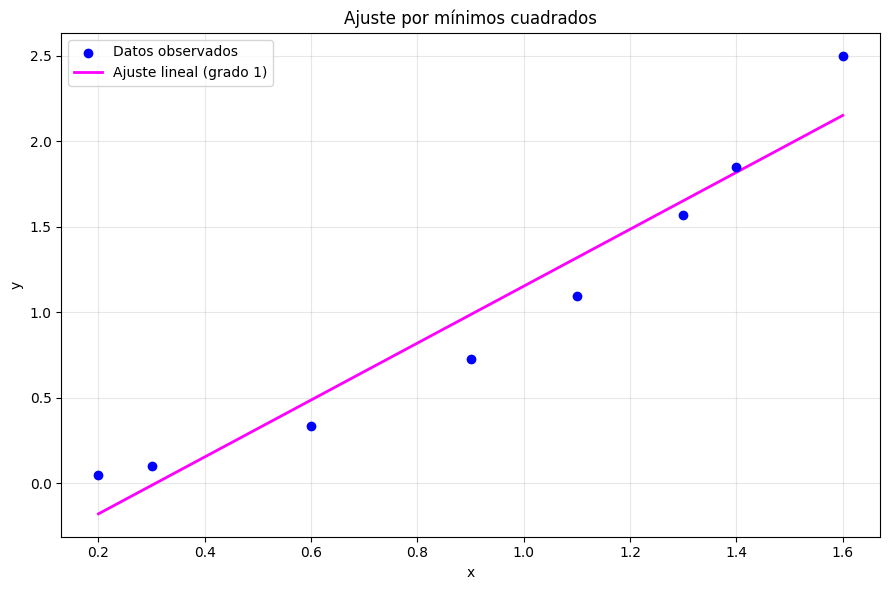

In [35]:

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6], dtype=float)
y = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015], dtype=float)

n = len(x)

# --- Sumas para las ecuaciones normales (grado 1) ---
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

# Coeficientes: y = a0 + a1*x
a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)  # pendiente
a0 = (sum_y - a1 * sum_x) / n                                 # intercepto

# Valores ajustados y residuos
y_hat = a0 + a1 * x
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)                  # Suma de cuadrados de los residuos
MSE = SSE / n                              # Error cuadrático medio
RMSE = np.sqrt(MSE)                        # Raíz del ECM
SS_tot = np.sum((y - np.mean(y))**2)

# Mostrar resultados
print(f"Polinomio de grado 1: y = {a0:.6f} + {a1:.6f}*x")

print(f"Error (SSE) = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# Gráfica
plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='blue', label='Datos observados', zorder=3)
plt.plot(x, y_hat, color='magenta', linewidth=2, label='Ajuste lineal (grado 1)')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.**

Polinomio de grado 2: y = 0.085144 + -0.311403*x + 1.129424*x^2
Error (SSE) = 0.002420
Error medio cuadrático (MSE) = 0.000302
Raíz del MSE (RMSE) = 0.017392


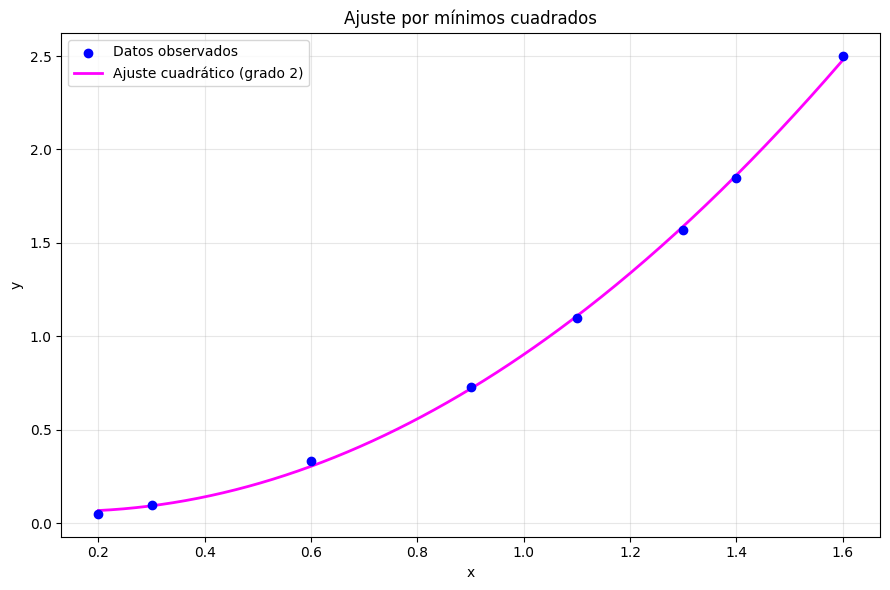

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6], dtype=float)
y = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015], dtype=float)

n = len(x)

# --- Sumas necesarias para las ecuaciones normales (grado 2) ---
sum_x   = np.sum(x)
sum_x2  = np.sum(x**2)
sum_x3  = np.sum(x**3)
sum_x4  = np.sum(x**4)

sum_y   = np.sum(y)
sum_xy  = np.sum(x * y)
sum_x2y = np.sum((x**2) * y)

# --- Sistema lineal: [a0, a1, a2] de p2(x) = a0 + a1*x + a2*x^2 ---
A = np.array([
    [n,      sum_x,  sum_x2],
    [sum_x,  sum_x2, sum_x3],
    [sum_x2, sum_x3, sum_x4]
], dtype=float)

b = np.array([sum_y, sum_xy, sum_x2y], dtype=float)

# Resolver el sistema
a0, a1, a2 = np.linalg.solve(A, b)

# Valores ajustados y residuos
y_hat = a0 + a1*x + a2*(x**2)
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)      # Suma de cuadrados de los residuos
MSE = SSE / n                  # Error cuadrático medio
RMSE = np.sqrt(MSE)            # Raíz del ECM
SS_tot = np.sum((y - np.mean(y))**2)

# Mostrar resultados
print(f"Polinomio de grado 2: y = {a0:.6f} + {a1:.6f}*x + {a2:.6f}*x^2")

print(f"Error (SSE) = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# Gráfica
x_grid = np.linspace(min(x), max(x), 300)
y_grid = a0 + a1*x_grid + a2*(x_grid**2)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='blue', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='magenta', linewidth=2, label='Ajuste cuadrático (grado 2)')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.**

Polinomio de grado 3: y = -0.018401 + 0.248386*x + 0.402932*x^2 + 0.266208*x^3
Error (SSE) = 0.000005075
Error medio cuadrático (MSE) = 0.000000634
Raíz del MSE (RMSE) = 0.000796451


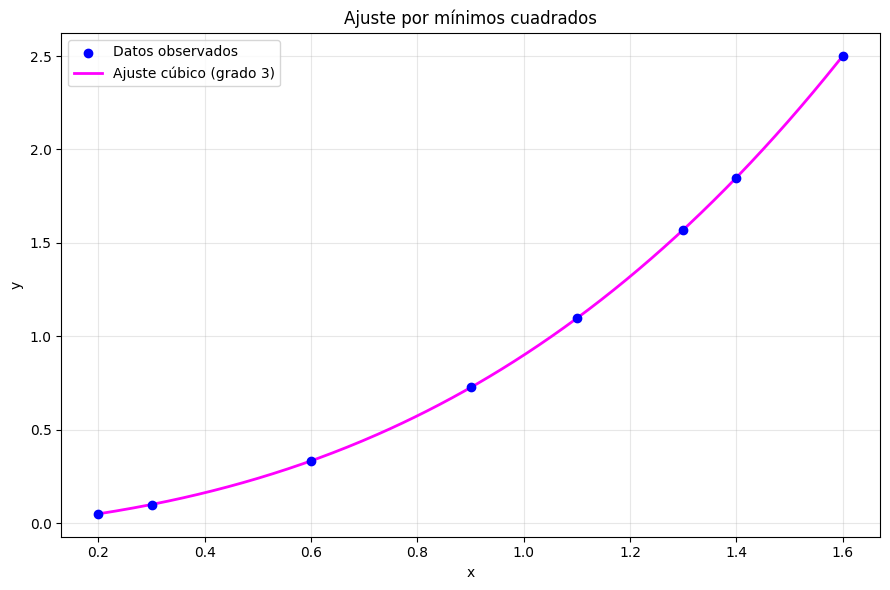

In [42]:

import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6], dtype=float)
y = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015], dtype=float)

n = len(x)

# --- Sumas necesarias para las ecuaciones normales (grado 3) ---
sum_x   = np.sum(x)
sum_x2  = np.sum(x**2)
sum_x3  = np.sum(x**3)
sum_x4  = np.sum(x**4)
sum_x5  = np.sum(x**5)
sum_x6  = np.sum(x**6)

sum_y    = np.sum(y)
sum_xy   = np.sum(x * y)
sum_x2y  = np.sum((x**2) * y)
sum_x3y  = np.sum((x**3) * y)

# --- Sistema lineal: [a0, a1, a2, a3] de p3(x) = a0 + a1*x + a2*x^2 + a3*x^3 ---
A = np.array([
    [n,      sum_x,  sum_x2, sum_x3],
    [sum_x,  sum_x2, sum_x3, sum_x4],
    [sum_x2, sum_x3, sum_x4, sum_x5],
    [sum_x3, sum_x4, sum_x5, sum_x6]
], dtype=float)

b = np.array([sum_y, sum_xy, sum_x2y, sum_x3y], dtype=float)

# Resolver el sistema
a0, a1, a2, a3 = np.linalg.solve(A, b)

# Valores ajustados y residuos
y_hat = a0 + a1*x + a2*(x**2) + a3*(x**3)
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)      # Suma de cuadrados de los residuos
MSE = SSE / n                  # Error cuadrático medio
RMSE = np.sqrt(MSE)            # Raíz del ECM
SS_tot = np.sum((y - np.mean(y))**2)

# Mostrar resultados
print(f"Polinomio de grado 3: y = {a0:.6f} + {a1:.6f}*x + {a2:.6f}*x^2 + {a3:.6f}*x^3")

print(f"Error (SSE) = {SSE:.9f}")
print(f"Error medio cuadrático (MSE) = {MSE:.9f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.9f}")

# Gráfica
x_grid = np.linspace(min(x), max(x), 300)
y_grid = a0 + a1*x_grid + a2*(x_grid**2) + a3*(x_grid**3)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='blue', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='magenta', linewidth=2, label='Ajuste cúbico (grado 3)')
plt.title('Ajuste por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



**d. Construya el polinomio por mínimos cuadrados de la forma $ be^{ax} $ y calcule el error.**

Modelo exponencial: y = 0.045707 * e^(2.707295 x)
Error (SSE) = 1.075048503
Error medio cuadrático (MSE) = 0.134381063
Raíz del MSE (RMSE) = 0.366580227


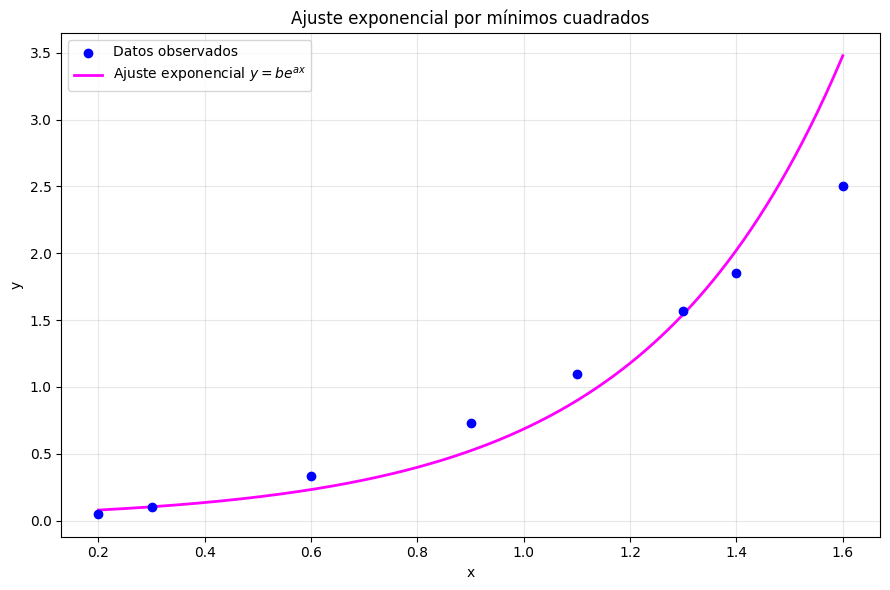

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6], dtype=float)
y = np.array([0.050446, 0.098426, 0.33277, 0.72660,
              1.0972, 1.5697, 1.8487, 2.5015], dtype=float)

n = len(x)

# --- Linealización del modelo: ln(y) = ln(b) + a*x ---
Y = np.log(y)

# --- Sumas necesarias para mínimos cuadrados ---
sum_x   = np.sum(x)
sum_x2  = np.sum(x**2)
sum_Y   = np.sum(Y)
sum_xY  = np.sum(x * Y)

# --- Sistema normal ---
A = np.array([
    [n,      sum_x],
    [sum_x,  sum_x2]
], dtype=float)

b_vec = np.array([sum_Y, sum_xY], dtype=float)

# Resolver el sistema
ln_b, a = np.linalg.solve(A, b_vec)
b = np.exp(ln_b)

# Valores ajustados y residuos
y_hat = b * np.exp(a * x)
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)      # Suma de cuadrados de los residuos
MSE = SSE / n                  # Error cuadrático medio
RMSE = np.sqrt(MSE)            # Raíz del ECM
SS_tot = np.sum((y - np.mean(y))**2)

# Mostrar resultados
print(f"Modelo exponencial: y = {b:.6f} * e^({a:.6f} x)")
print(f"Error (SSE) = {SSE:.9f}")
print(f"Error medio cuadrático (MSE) = {MSE:.9f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.9f}")

# --- Gráfica ---
x_grid = np.linspace(min(x), max(x), 300)
y_grid = b * np.exp(a * x_grid)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='blue', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='magenta', linewidth=2,
         label='Ajuste exponencial $y = b e^{ax}$')
plt.title('Ajuste exponencial por mínimos cuadrados')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**e. Construya el polinomio por mínimos cuadrados de la forma $ bx^a $ y calcule el error.**

Modelo potencia: y = 0.950156 * x^(1.872009)
Error (SSE) = 0.054476780
Error medio cuadrático (MSE) = 0.006809598
Raíz del MSE (RMSE) = 0.082520286


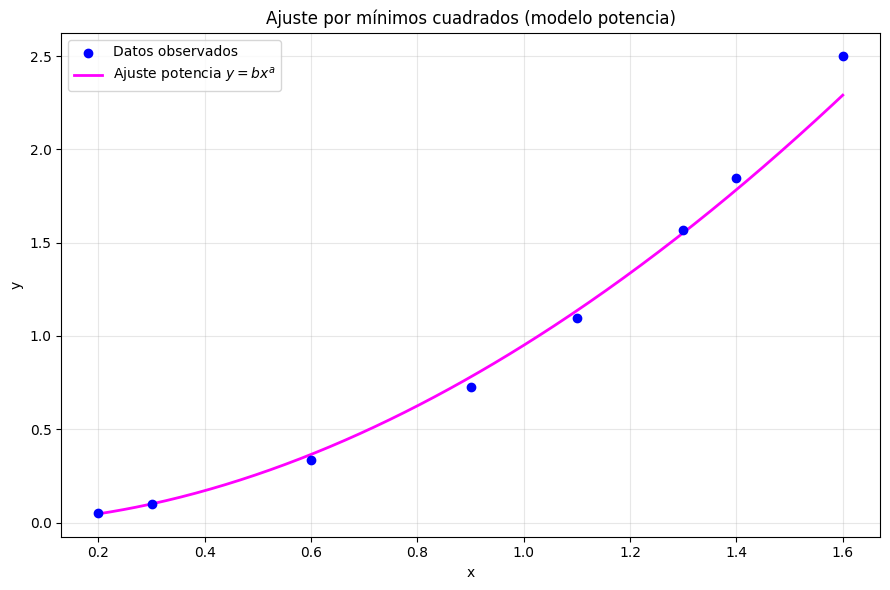

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6], dtype=float)
y = np.array([0.050446, 0.098426, 0.33277, 0.72660,
              1.0972, 1.5697, 1.8487, 2.5015], dtype=float)

n = len(x)

# --- Linealización: ln(y) = ln(b) + a ln(x) ---
X = np.log(x)
Y = np.log(y)

# --- Sumas necesarias para mínimos cuadrados ---
sum_X   = np.sum(X)
sum_X2  = np.sum(X**2)
sum_Y   = np.sum(Y)
sum_XY  = np.sum(X * Y)

# --- Sistema normal ---
A = np.array([
    [n,      sum_X],
    [sum_X,  sum_X2]
], dtype=float)

b_vec = np.array([sum_Y, sum_XY], dtype=float)

# Resolver el sistema
ln_b, a = np.linalg.solve(A, b_vec)
b = np.exp(ln_b)

# Valores ajustados y residuos
y_hat = b * (x ** a)
residuos = y - y_hat

# Métricas de error
SSE = np.sum(residuos**2)   # Suma de cuadrados del error
MSE = SSE / n               # Error cuadrático medio
RMSE = np.sqrt(MSE)         # Raíz del ECM

# Mostrar resultados
print(f"Modelo potencia: y = {b:.6f} * x^({a:.6f})")
print(f"Error (SSE) = {SSE:.9f}")
print(f"Error medio cuadrático (MSE) = {MSE:.9f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.9f}")

# --- Gráfica ---
x_grid = np.linspace(min(x), max(x), 300)
y_grid = b * (x_grid ** a)

plt.figure(figsize=(9, 6))
plt.scatter(x, y, color='blue', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='magenta', linewidth=2,
         label='Ajuste potencia $y = b x^{a}$')
plt.title('Ajuste por mínimos cuadrados (modelo potencia)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**3. La siguiente tabla muestra los promedios de puntos del colegio de 20 especialistas en matemáticas y ciencias computacionales, junto con las calificaciones que recibieron estos estudiantes en la parte de matemáticas de la prueba ACT (Programa de Pruebas de Colegios Americanos) mientras estaban en secundaria. Grafique estos datos y encuentre la ecuación de la recta por mínimos cuadrados para estos datos.**

| Puntuación ACT | Promedio de puntos | Puntuación ACT | Promedio de puntos |
|----------------|--------------------|----------------|--------------------|
| 28             | 3.84               | 29             | 3.75               |
| 25             | 3.21               | 28             | 3.65               |
| 28             | 3.23               | 27             | 3.87               |
| 27             | 3.63               | 29             | 3.75               |
| 28             | 3.75               | 21             | 1.66               |
| 33             | 3.20               | 28             | 3.12               |
| 28             | 3.41               | 28             | 2.96               |
| 29             | 3.38               | 26             | 2.92               |
| 23             | 3.53               | 30             | 3.10               |
| 27             | 2.03               | 24             | 2.81               |

Recta por mínimos cuadrados:
y = 0.436159 + 0.101894*x
Error (SSE) = 4.862656
Error medio cuadrático (MSE) = 0.255929
Raíz del MSE (RMSE) = 0.505895


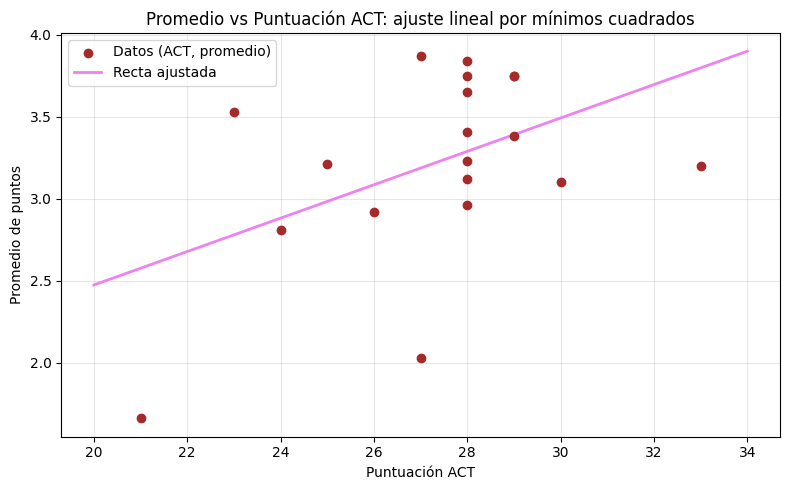

In [62]:

import numpy as np
import matplotlib.pyplot as plt

# Datos: (ACT, promedio)
data_pairs = [
    (28, 3.84), (29, 3.75), (25, 3.21), (28, 3.65), (28, 3.23), (27, 3.87),
    (29, 3.75), (28, 3.75), (21, 1.66), (33, 3.20), (28, 3.12), (28, 3.41),
    (28, 2.96), (29, 3.38), (26, 2.92), (23, 3.53), (30, 3.10), (27, 2.03),
    (24, 2.81)
]

x = np.array([p[0] for p in data_pairs], dtype=float)
y = np.array([p[1] for p in data_pairs], dtype=float)
n = len(x)

# --- Ajuste lineal por ecuaciones normales ---
sum_x  = np.sum(x)
sum_y  = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x**2)

a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)  # pendiente
a0 = (sum_y - a1 * sum_x) / n                                 # intercepto

# Valores ajustados y métricas
y_hat = a0 + a1 * x
res   = y - y_hat

SSE   = np.sum(res**2)
MSE   = SSE / n
RMSE  = np.sqrt(MSE)
SS_tot= np.sum((y - np.mean(y))**2)

print("Recta por mínimos cuadrados:")
print(f"y = {a0:.6f} + {a1:.6f}*x")
print(f"Error (SSE) = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# --- Gráfica ---
x_grid = np.linspace(min(x)-1, max(x)+1, 200)
y_grid = a0 + a1 * x_grid

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='brown', label='Datos (ACT, promedio)', zorder=3)
plt.plot(x_grid, y_grid, color='violet', linewidth=2, label='Recta ajustada')
plt.title('Promedio vs Puntuación ACT: ajuste lineal por mínimos cuadrados')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**4. El siguiente conjunto de datos, presentado al Subcomité Antimonopolio del Senado, muestra las
características comparativas de supervivencia durante un choque de automóviles de diferentes clases.
Encuentre la recta por mínimos cuadrados que aproxima estos datos (la tabla muestra el porcentaje de
vehículos que participaron en un accidente en los que la lesión más grave fue fatal o seria).**

| Tipo                             | Peso promedio | Porcentaje de presentación |
|----------------------------------|---------------|-----------------------------|
| 1. Regular lujoso doméstico      | 4800 lb       | 3.1                         |
| 2. Regular intermediario doméstico | 3700 lb     | 4.0                         |
| 3. Regular económico doméstico   | 3400 lb       | 5.2                         |
| 4. Compacto doméstico            | 2800 lb       | 6.4                         |
| 5. Compacto extranjero           | 1900 lb       | 9.6                         |

Recta por mínimos cuadrados:
y = 13.146500 + -0.002255*x
Error (SSE)  = 2.059136
Error medio cuadrático (MSE) = 0.411827
Raíz del MSE (RMSE) = 0.641738


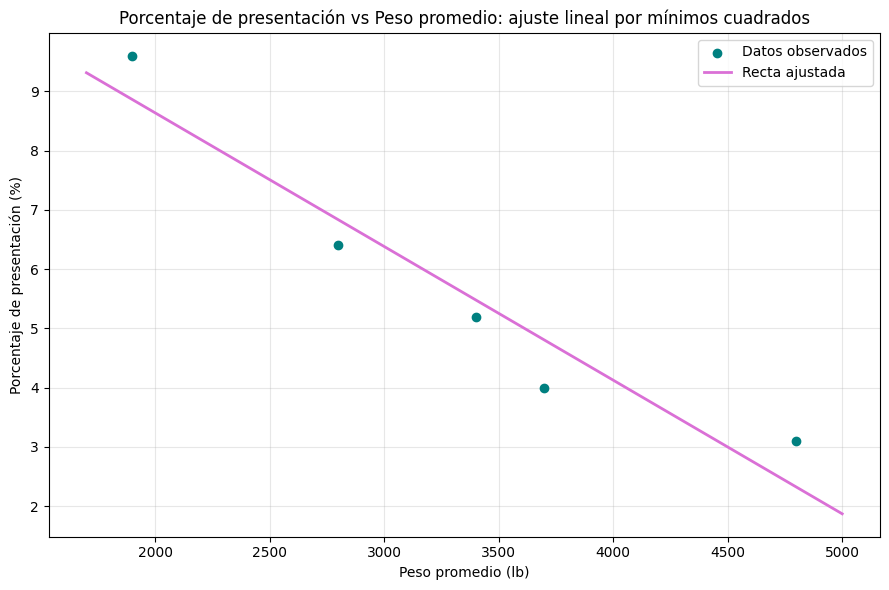

In [66]:

import numpy as np
import matplotlib.pyplot as plt

# Datos: Peso promedio (lb) y Porcentaje de presentación (%)
peso = np.array([4800, 3700, 3400, 2800, 1900], dtype=float)
porcentaje = np.array([3.1, 4.0, 5.2, 6.4, 9.6], dtype=float)

n = len(peso)

# --- Ajuste lineal por ecuaciones normales ---
sum_x  = np.sum(peso)
sum_y  = np.sum(porcentaje)
sum_xy = np.sum(peso * porcentaje)
sum_x2 = np.sum(peso ** 2)

# Coeficientes de la recta y = a0 + a1*x
a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)   # pendiente
a0 = (sum_y - a1 * sum_x) / n                                    # intercepto

# Valores ajustados y residuos
y_hat = a0 + a1 * peso
residuos = porcentaje - y_hat

# Métricas de error
SSE = np.sum(residuos ** 2)                   # Suma de cuadrados de los residuos
MSE = SSE / n                                 # Error cuadrático medio
RMSE = np.sqrt(MSE)                           # Raíz del ECM
SS_tot = np.sum((porcentaje - np.mean(porcentaje)) ** 2)

# Mostrar resultados
print("Recta por mínimos cuadrados:")
print(f"y = {a0:.6f} + {a1:.6f}*x")

print(f"Error (SSE)  = {SSE:.6f}")
print(f"Error medio cuadrático (MSE) = {MSE:.6f}")
print(f"Raíz del MSE (RMSE) = {RMSE:.6f}")

# --- Gráfica ---
x_grid = np.linspace(peso.min() - 200, peso.max() + 200, 400)
y_grid = a0 + a1 * x_grid

plt.figure(figsize=(9, 6))
plt.scatter(peso, porcentaje, color='teal', label='Datos observados', zorder=3)
plt.plot(x_grid, y_grid, color='orchid', linewidth=2, label='Recta ajustada')
plt.title('Porcentaje de presentación vs Peso promedio: ajuste lineal por mínimos cuadrados')
plt.xlabel('Peso promedio (lb)')
plt.ylabel('Porcentaje de presentación (%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
